In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
import PIL.Image as Image
import os
import scipy.fftpack

In [ ]:
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))
    
    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    # cols for windowing
    cols = int(np.ceil( (len(samples) - frameSize) / float(hopSize))) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))
    
    frames = stride_tricks.as_strided(samples, shape=(cols, frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win
    
    return np.fft.rfft(frames)    
    

In [ ]:
def plotstft(audiopath, binsize=2**10, plotpath=None, colormap="jet", channel=3, name='tmp.png', alpha=1, offset=0):
    samplerate, samples = wav.read(audiopath)
    #samples = samples[:, channel]
    s = stft(samples, binsize)

    sshow, freq = logscale_spec(s, factor=1, sr=samplerate, alpha=alpha)
    sshow = sshow[2:, :]
    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel
    timebins, freqbins = np.shape(ims)
    
    ims = np.transpose(ims)
    # ims = ims[0:256, offset:offset+768] # 0-11khz, ~9s interval
    ims = ims[0:100, :] # 0-11khz, ~10s interval
    #print "ims.shape", ims.shape
    
    image = Image.fromarray(ims) 
    image = image.convert('L')
    image.save(name)

In [ ]:
'''
file = open('/home/telxsi.com/snigdha.n/Desktop/mandarin/man2.csv', 'r')
for iter, line in enumerate(file.readlines()[1:]): # first line of traininData.csv is header (only for trainingData.csv)
    filepath = line.split(',')[0]
    filename = filepath[:-4]
'''

for paths,dirs,files in os.walk("path-to-folder"):
    for filesname in files:
        wavfile =  "/home/telxsi.com/snigdha.n/Desktop/test/t1/"+ filesname 
            #os.system('mpg123 -w ' + wavfile + '/home/telxsi.com/snigdha.n/Desktop/Nupur_pyfiles/Chinese_Download/For_training/database_new/all/mandarin_00' + filepath)
  # for path, dirs, files in os.walk("/home/telxsi.com/snigdha.n/Desktop/Nupur_pyfiles/Chinese_Download/For_training/database_new/all/"):
#         for filename in files:
#             wavfile ='/home/telxsi.com/snigdha.n/Desktop/Nupur_pyfiles/Chinese_Download/For_training/database_new/all/mandarin_36401.wav'
    # we create only one spectrogram for each speach sample
    # we don't do vocal tract length perturbation (alpha=1.0)
    # also we don't crop 9s part from the speech
        plotstft(wavfile, name='/home/telxsi.com/snigdha.n/Desktop/test/spec/'+filesname.split(".")[0]+'.png', alpha=1.0)
            #os.remove(wavfile)
       # print "processed %d files" % (iter + 1)

In [18]:
audiopath= "/home/telxsi.com/snigdha.n/Desktop/Nupur_pyfiles/Chinese_Download/For_training/database_new/eng/english_english_1.wav"
binsize=1024
samplerate, samples = wav.read(audiopath)
#samples = samples[:, channel]
s = stft(samples, binsize)
sshow, freq = logscale_spec(s, factor=1, sr=samplerate, alpha=1)


In [19]:
len(freq)

256

In [20]:
%matplotlib inline

In [21]:
sshow = sshow[2:, :]
ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel

860


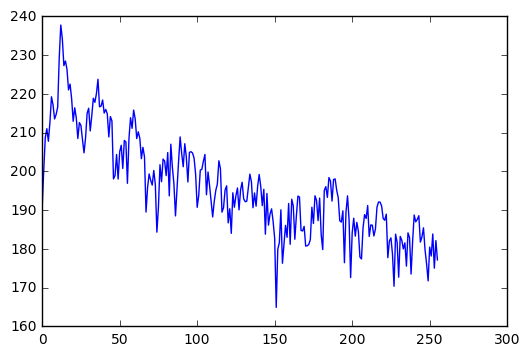

In [22]:
#ims = ims[0:256, :]
print len(ims)
plt.plot(ims[1])

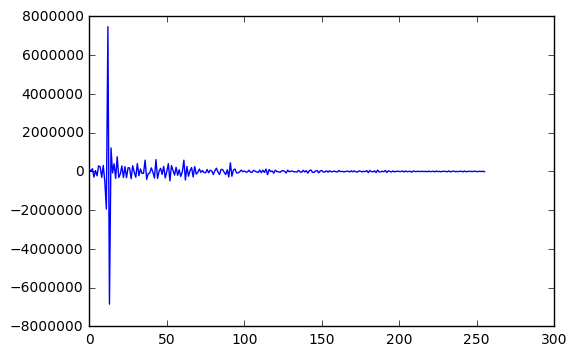

In [23]:
plt.plot(np.real(sshow[0]))

In [ ]:
dominant_freq =

In [24]:
sshow, freq = logscale_spec(s, factor=1, sr=samplerate, alpha=1)
sshow = sshow[2:, :]
ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel
timebins, freqbins = np.shape(ims)

ims = np.transpose(ims)
# ims = ims[0:256, offset:offset+768] # 0-11khz, ~9s interval
ims = ims[0:256, :] # 0-11khz, ~10s interval
#print "ims.shape", ims.shape

image = Image.fromarray(ims) 
image = image.convert('L')
image.save(name)

NameError: name 'name' is not defined